# Factor Model of Portfolio Return


In [1]:
import numpy as np
import pandas as pd
import time
import os
# import quiz_helper
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

### data bundle

In [3]:
import os
# import quiz_helper
from zipline.data import bundles

In [4]:

import zipline.data.bundles as bundles
import pandas as pd
from zipline.data.bundles import register, yahoo_NYSE, csvdir

# Specify the bundle name
bundle_name = 'yahoo_NYSE'

start_session = pd.Timestamp('2013-07-01')  # Timezone-naive
end_session = pd.Timestamp('2017-06-30')    # Timezone-naive


register(
    'yahoo_NYSE',
    yahoo_NYSE.yahoo_NYSE(
        tframes=["daily"],
        csvdir="/home/ankit/AI_for_trading/Data/data/eod-quotemedia/"
    )
)

bundle_data = bundles.load('yahoo_NYSE')

/tmp/ipykernel_2935/1568509080.py:12: UserWarning: Overwriting bundle with name 'yahoo_NYSE'
  register(


### Build pipeline engine

In [5]:
from zipline.pipeline import Pipeline
from zipline.pipeline.factors import AverageDollarVolume
from zipline.utils.calendar_utils import get_calendar
from zipline.pipeline import engine
from zipline.pipeline.loaders import USEquityPricingLoader
from zipline.pipeline.data import USEquityPricing

def choose_price_loader(column):
    if column not in USEquityPricing.columns:
        print("Column not in USEquityPricing.columns")
    return pricing_loader

universe = AverageDollarVolume(window_length=120).top(500) 
trading_calendar = get_calendar('NYSE') 

# Set the dataloader
pricing_loader = USEquityPricingLoader(bundle_data.equity_daily_bar_reader, bundle_data.adjustment_reader,fx_reader=None)


engine = engine.SimplePipelineEngine(choose_price_loader,asset_finder=bundle_data.asset_finder)

In [8]:
from zipline.pipeline.domain import US_EQUITIES

universe_end_date = pd.Timestamp('2017-01-06')

universe_tickers = engine\
    .run_pipeline(
        Pipeline(screen=universe,domain=US_EQUITIES),
        universe_end_date,
        universe_end_date)\
    .index.get_level_values(1)\
    .values.tolist()
    
universe_tickers

[Equity(0 [A]),
 Equity(1 [AAL]),
 Equity(2 [AAP]),
 Equity(3 [AAPL]),
 Equity(4 [ABBV]),
 Equity(5 [ABT]),
 Equity(6 [ACN]),
 Equity(7 [ADBE]),
 Equity(8 [ADI]),
 Equity(9 [ADM]),
 Equity(10 [ADP]),
 Equity(11 [ADSK]),
 Equity(12 [AEE]),
 Equity(13 [AEP]),
 Equity(14 [AES]),
 Equity(15 [AET]),
 Equity(16 [AFL]),
 Equity(17 [AIG]),
 Equity(18 [AIV]),
 Equity(19 [AIZ]),
 Equity(20 [AJG]),
 Equity(21 [AKAM]),
 Equity(22 [ALB]),
 Equity(23 [ALGN]),
 Equity(24 [ALK]),
 Equity(25 [ALL]),
 Equity(26 [AMAT]),
 Equity(27 [AMD]),
 Equity(28 [AME]),
 Equity(29 [AMG]),
 Equity(30 [AMGN]),
 Equity(31 [AMP]),
 Equity(32 [AMT]),
 Equity(33 [AMZN]),
 Equity(34 [ANDV]),
 Equity(35 [ANSS]),
 Equity(36 [AON]),
 Equity(37 [AOS]),
 Equity(38 [APA]),
 Equity(39 [APD]),
 Equity(40 [APH]),
 Equity(41 [ARE]),
 Equity(42 [AVB]),
 Equity(43 [AVGO]),
 Equity(44 [AVY]),
 Equity(45 [AWK]),
 Equity(46 [AXP]),
 Equity(47 [AYI]),
 Equity(48 [AZO]),
 Equity(49 [BA]),
 Equity(50 [BAC]),
 Equity(51 [BAX]),
 Equity(52 [B

In [9]:
from zipline.data.data_portal import DataPortal

data_portal = DataPortal(
    bundle_data.asset_finder,
    trading_calendar=trading_calendar,
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_minute_reader=None,
    equity_daily_reader=bundle_data.equity_daily_bar_reader,
    adjustment_reader=bundle_data.adjustment_reader)

## get pricing data into a dataframe

In [10]:

def get_pricing(data_portal, trading_calendar, assets, start_date, end_date, field='close'):
    end_dt = pd.Timestamp(end_date.strftime('%Y-%m-%d'))
    start_dt = pd.Timestamp(start_date.strftime('%Y-%m-%d'))

    end_loc = trading_calendar.closes.index.get_loc(end_dt)
    start_loc = trading_calendar.closes.index.get_loc(start_dt)

    return data_portal.get_history_window(
        assets=assets,
        end_dt=end_dt,
        bar_count=end_loc - start_loc,
        frequency='1d',
        field=field,
        data_frequency='daily')

returns_df = \
    get_pricing(
        data_portal,
        trading_calendar,
        universe_tickers,
        universe_end_date - pd.DateOffset(years=2),
        universe_end_date)\
    .pct_change()[1:].fillna(0) #convert prices into returns

returns_df

,Equity(0 [A]),Equity(1 [AAL]),Equity(2 [AAP]),Equity(3 [AAPL]),Equity(4 [ABBV]),Equity(5 [ABT]),Equity(6 [ACN]),Equity(7 [ADBE]),Equity(8 [ADI]),Equity(9 [ADM]),...,Equity(398 [WYNN]),Equity(399 [XEL]),Equity(400 [XOM]),Equity(401 [XRAY]),Equity(402 [XRX]),Equity(403 [XYL]),Equity(404 [YUM]),Equity(405 [ZBH]),Equity(406 [ZION]),Equity(407 [ZTS])
2015-01-08,0.029975,0.012262,0.008765,0.038384,0.010459,0.020554,0.015249,0.025454,0.017655,-0.014609,...,0.012031,0.011599,0.016645,0.024689,0.027531,0.007546,0.017404,0.010623,0.013994,0.015399
2015-01-09,-0.007337,-0.030563,-0.005089,0.001108,-0.027355,-0.010508,-0.001113,-0.014811,-0.000730,-0.008530,...,0.012499,-0.012285,-0.001410,-0.014569,-0.005798,-0.018863,-0.001758,-0.014427,-0.027975,0.001584
2015-01-12,-0.011826,-0.046905,-0.008546,-0.024676,-0.000304,0.008407,-0.003007,-0.010022,-0.010051,-0.012495,...,-0.003958,-0.008845,-0.019218,-0.009477,-0.010199,-0.021770,-0.007480,0.002370,-0.015349,-0.018757
2015-01-13,-0.013962,0.016539,-0.032530,0.008897,-0.036040,-0.021281,0.003575,-0.007452,-0.011445,0.001452,...,0.009093,0.008087,-0.003653,-0.003062,0.005166,0.002312,-0.004121,0.002191,-0.017147,-0.014049
2015-01-14,-0.012389,-0.019643,-0.019056,-0.003811,0.004890,-0.007397,-0.011689,-0.008500,-0.000747,-0.017191,...,-0.008077,0.008852,-0.002889,-0.014587,0.004389,-0.006344,-0.004138,-0.013219,-0.017050,0.005139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30,-0.001753,-0.011852,-0.006812,-0.007813,-0.001754,0.002610,0.001026,-0.007041,-0.013047,0.006393,...,-0.007571,-0.005862,-0.000996,-0.008927,0.001132,-0.005023,-0.004715,-0.002896,0.005842,-0.001678
2017-01-03,0.020413,-0.008353,0.008751,0.002867,-0.003354,0.016662,-0.005720,0.005148,-0.001515,0.011829,...,0.010981,-0.001966,0.006980,0.015417,0.198053,0.002625,-0.001895,0.001258,0.003253,0.001121
2017-01-04,0.013121,0.008639,0.008206,-0.001136,0.014100,0.007939,0.002404,0.006378,-0.002069,-0.001732,...,0.032243,0.004431,-0.011002,0.008188,0.037736,0.014904,0.003639,0.009201,0.014358,0.009703
2017-01-05,-0.011890,-0.017345,-0.000698,0.005103,0.007584,0.008638,-0.014991,0.016996,-0.014373,-0.007374,...,0.012849,0.000000,-0.014907,-0.013029,-0.004196,-0.009129,0.003310,0.006420,-0.016210,-0.003327


## Let's look at a two stock portfolio

Let's pretend we have a portfolio of two stocks.  We'll pick Apple and Microsoft in this example.

In [11]:
aapl_col = returns_df.columns[3]
msft_col = returns_df.columns[312]
asset_return_1 = returns_df[aapl_col].rename('asset_return_aapl')
asset_return_2 = returns_df[msft_col].rename('asset_return_msft')
asset_return_df = pd.concat([asset_return_1,asset_return_2],axis=1)
asset_return_df.head(2)

,asset_return_aapl,asset_return_msft
2015-01-08,0.038384,0.010579
2015-01-09,0.001108,-0.001208


## Factor returns
Let's make up a "factor" by taking an average of all stocks in our list.  You can think of this as an equal weighted index of the 490 stocks, kind of like a measure of the "market".  We'll also make another factor by calculating the median of all the stocks.  These are mainly intended to help us generate some data to work with.  We'll go into how some common risk factors are generated later in the lessons.

Also note that we're setting axis=1 so that we calculate a value for each time period (row) instead of one value for each column (assets).

In [16]:
factor_return_1 = returns_df.mean(axis=1)
factor_return_2 = returns_df.median(axis=1)
factor_return_port = [factor_return_1, factor_return_2]

## Factor exposures

Factor exposures refer to how "exposed" a stock is to each factor.  We'll get into this more later.  For now, just think of this as one number for each stock, for each of the factors.

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
"""
For now, just assume that we're calculating a number for each 
stock, for each factor, which represents how "exposed" each stock is
to each factor. 
We'll discuss how factor exposure is calculated later in the lessons.
"""
def get_factor_exposures(factor_return_port, asset_return):
    lr = LinearRegression()
    X = np.array(factor_return_port).T
    y = np.array(asset_return.values)
    lr.fit(X,y)
    return lr.coef_

In [17]:
factor_exposure_l = []
for i in range(len(asset_return_df.columns)):
    factor_exposure_l.append(
        get_factor_exposures(factor_return_port,
                             asset_return_df[asset_return_df.columns[i]]
                            ))
    
factor_exposure_a = np.array(factor_exposure_l)

In [18]:
print(f"factor_exposures for asset 1 {factor_exposure_a[0]}")
print(f"factor_exposures for asset 2 {factor_exposure_a[1]}")

factor_exposures for asset 1 [0.74250549 0.20961105]
factor_exposures for asset 2 [ 2.56672727 -1.64001956]


## Quiz 1 Portfolio's factor exposures

Let's make up some portfolio weights for now; in a later lesson, we'll look at how portfolio optimization combines alpha factors and a risk factor model to choose asset weights.

$\beta_{p,k} = \sum_{i=1}^{N}(x_i \times \beta_{i,k})$

In [19]:
weight_1 = 0.60 #let's give AAPL a portfolio weight
weight_2 = 0.40 #give MSFT a portfolio weight
weight_a = np.array([weight_1, weight_2])

For the sake of understanding, try saving each of the values
into a separate variable to perform the multipliations and additions
Check that your calculations for portfolio factor exposure match
the output of this dot product:
```
weight_a.dot(factor_exposure_a)
```

In [20]:
# TODO: calculate portfolio's exposure to factor 1
factor_exposure_1_1 = factor_exposure_a[0][0]
factor_exposure_2_1 = factor_exposure_a[1][0]
factor_exposure_p_1 = weight_a[0]*factor_exposure_1_1 + weight_a[1]*factor_exposure_2_1
factor_exposure_p_1

1.4721941985791762

In [21]:
# TODO: calculate portfolio's exposure to factor 2
factor_exposure_1_2 = factor_exposure_a[0][1]
factor_exposure_2_2 = factor_exposure_a[1][1]
factor_exposure_p_2 = weight_a[0]*factor_exposure_1_2 + weight_a[1]*factor_exposure_2_2
factor_exposure_p_2

-0.5302411918777612

## Quiz 2 Calculate portfolio return

For clarity, try storing the pieces into their own 
named variables and writing out the multiplications and addition.

You can check if your answer matches this output:
```
asset_return_df.values.dot(weight_a)
```

In [22]:
# TODO calculate the portfolio return
asset_return_1 = asset_return_df[asset_return_df.columns[0]]
asset_return_2 = asset_return_df[asset_return_df.columns[1]]
portfolio_return = weight_a[0]*asset_return_1 + weight_a[1]*asset_return_2

portfolio_return = pd.Series(portfolio_return,index=asset_return_df.index).rename('portfolio_return')
portfolio_return.head(2)

2015-01-08    0.027262
2015-01-09    0.000182
Freq: C, Name: portfolio_return, dtype: float64

## Quiz 3 Contribution of Factors

The sum of the products of factor exposure times factor return is the contribution of the factors.  It's also called the "common return." calculate the common return of the portfolio, given the two factor exposures and the two factor returns.

In [23]:
# TODO: Calculate the contribution of the two factors to the return of this example asset
common_return = factor_exposure_p_1*factor_return_port[0] + factor_exposure_p_1*factor_return_port[1]
common_return = common_return.rename('common_return')

common_return.head(2)

2015-01-08    0.051438
2015-01-09   -0.024086
Freq: C, Name: common_return, dtype: float64

## Quiz 4 Specific Return
The specific return is the part of the portfolio return that isn't explained by the factors.  So it's the actual return minus the common return.  
Calculate the specific return of the stock.

In [24]:
# TODO: calculate the specific return of this asset
specific_return = portfolio_return - common_return
specific_return = specific_return.rename('specific_return')

## Visualize the common return and specific return


In [25]:
return_components = pd.concat([common_return,specific_return],axis=1)
return_components.head(2)

,common_return,specific_return
2015-01-08,0.051438,-0.024175
2015-01-09,-0.024086,0.024268


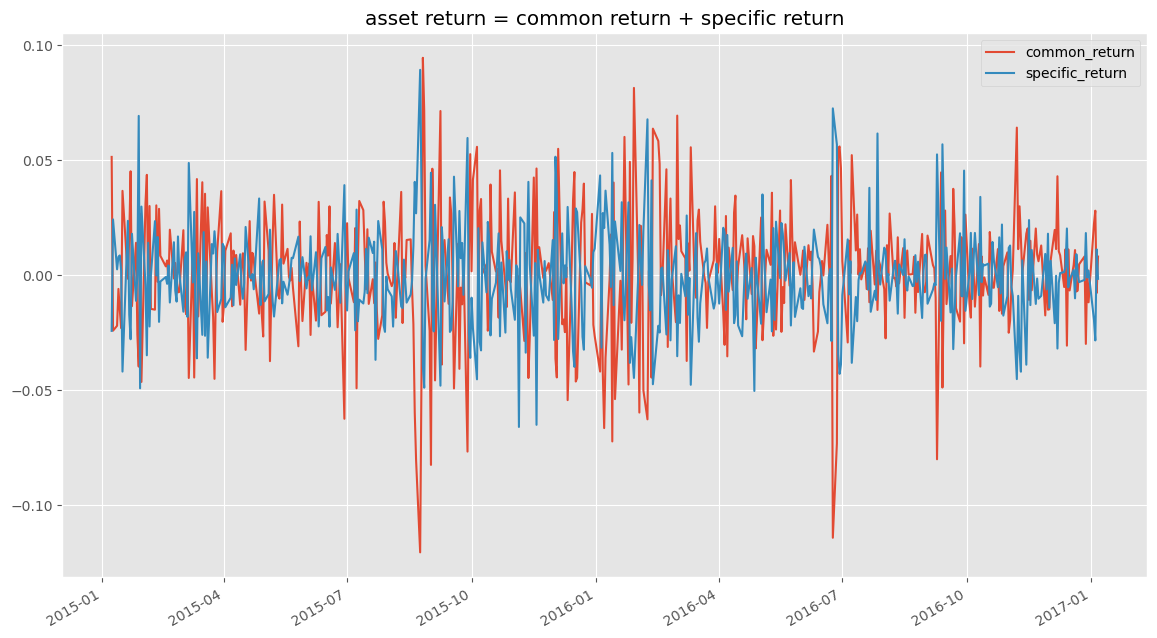

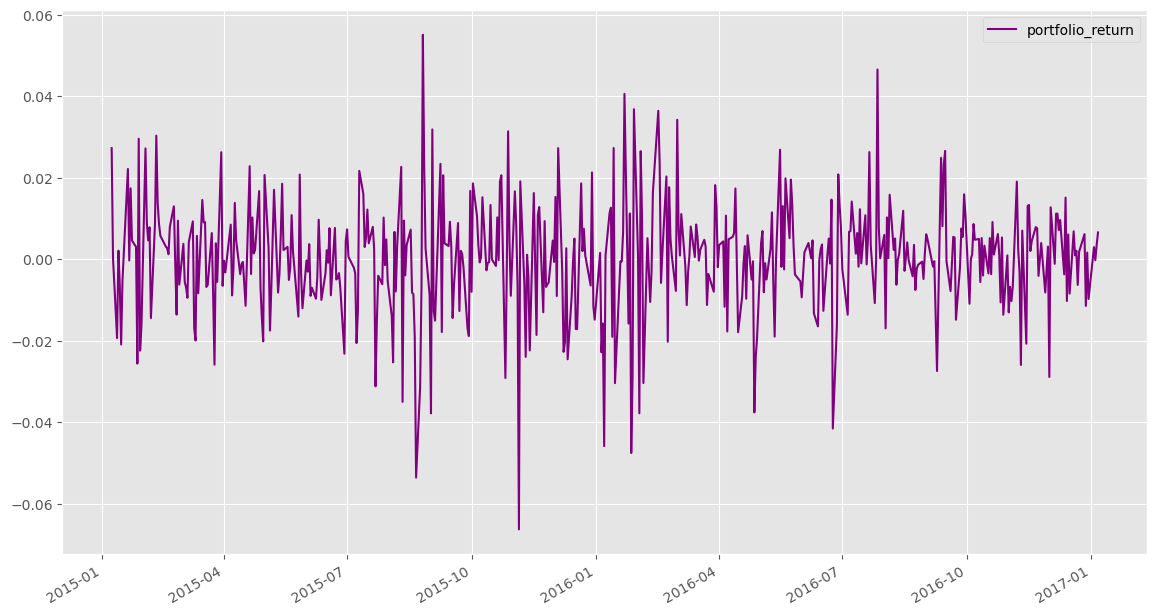

In [26]:
return_components.plot(title="asset return = common return + specific return");
pd.DataFrame(portfolio_return).plot(color='purple');

## Solution
[Solution notebook](factor_model_portfolio_return_solution.ipynb)